In [1]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from glob import glob
from tqdm import tqdm

from loader.utils import window
from loader.utils import apply_window
from loader.utils import dcm_to_array
from loader.utils import bodyct_dcm_to_pil
from loader.preprocessing import BodyBoundary

# 디렉토리에서 DICOM 이미지 로드하기

src_dir : DICOM이 저장되어있는 디렉토리  
dst_dir : PNG 저장 디렉토리   

src_dir 하위에 존재하는 DICOM 파일 recursive하게 찾기

In [2]:
src_dir = '/mnt/dataset/Synthesis_Study/2022/AbdomenCT_abnormal'
dst_dir = '/mnt/dataset/Synthesis_Study/2022/AbdomenCT_abnormal_png'

In [3]:
files = glob(os.path.join(src_dir, '**/*.dcm'), recursive=True)
print(f"{len(files)} dicom files are found in {src_dir}")

30553 dicom files are found in /mnt/dataset/Synthesis_Study/2022/AbdomenCT_abnormal


# Window 적용한 이미지 시각화하기

## Argument 정하기 (windowing, body_only)
 *** 중요 ***  
 Windowing 적용   
 WL: 35, WW: 350 => [-140, 210] 

### Sample image

In [4]:
sample = files[0]
w_range = (-140, 210)

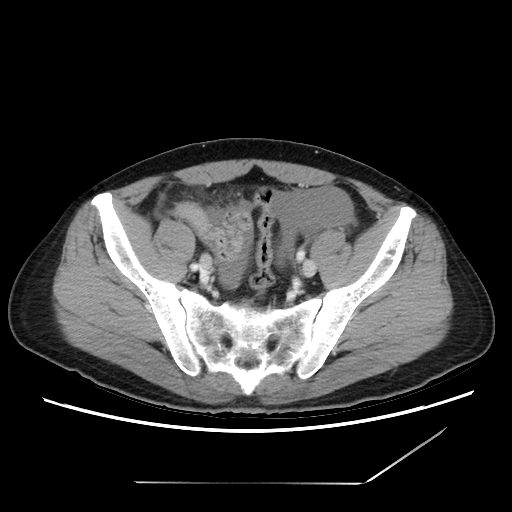

In [9]:
body_only = False # Bed 제거 x
pil_img = bodyct_dcm_to_pil(file=sample, w_range=w_range, body_only=body_only)
pil_img

### Bed 제거

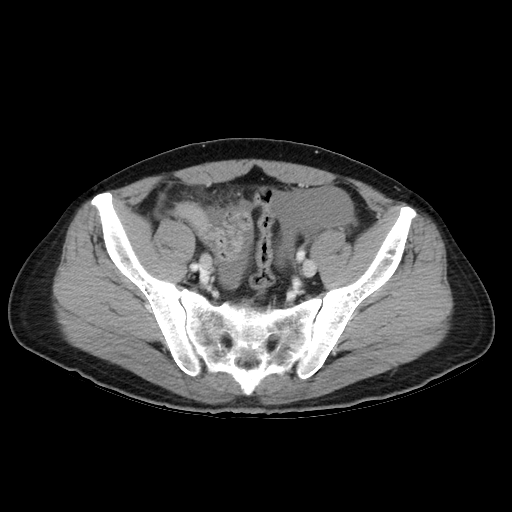

In [10]:
body_only = True # Bed 제거 o
pil_img = bodyct_dcm_to_pil(file=sample, w_range=w_range, body_only=body_only)
pil_img

# 원하는 window, body_only 정하기

In [11]:
w_range = (-140, 210)
body_only = True

In [15]:
for file in tqdm(files):
    
    pil_img = bodyct_dcm_to_pil(file, w_range=w_range, body_only=body_only)
    
    dst = file.replace(src_dir, dst_dir)
    os.makedirs(os.path.split(dst)[0])
    dst = dst.replace('.dcm', '.png')
    
    if os.path.exists(dst):
        continue
    pil_img.save(dst, quality=100)


  0%|                                                                                                                                             | 0/30553 [00:00<?, ?it/s]
